In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:
myopiaDF = pd.read_csv('./myopia.csv')

myopiaDF.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
#target not needed in unsupervised learning
myopiaDrop = myopiaDF.drop(columns= ['MYOPIC'])

myopiaDrop.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [7]:
#search for null values
for column in myopiaDrop.columns:
    print(f'Column {column} has {myopiaDrop[column].isnull().sum()} null values')

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [9]:
#search for duplicate values
print(f'Duplicate entries: {myopiaDrop.duplicated().sum()}')

Duplicate entries: 0


In [10]:
#scaling data
scaler = StandardScaler()
myopiaDropScaled = scaler.fit_transform(myopiaDrop)

myopiaDropScaled

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

In [12]:
#apply dimensionality reduction
pca = PCA(n_components=0.9)
myopiaPCA = pca.fit_transform(myopiaDropScaled)

myopiaPCA.shape

(618, 10)

In [14]:
#further reduce dataset with t-SNE
tsne = TSNE(learning_rate=30)
tsneFeatures = tsne.fit_transform(myopiaPCA)

tsneFeatures.shape

(618, 2)

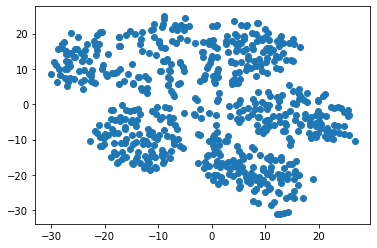

In [17]:
#plot tsne data
plt.scatter(tsneFeatures[:,0], tsneFeatures[:,1])

In [18]:
#conduct k-means analysis
inertia = []
k = list(range(1,11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopiaPCA)
    inertia.append(km.inertia_)

H:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


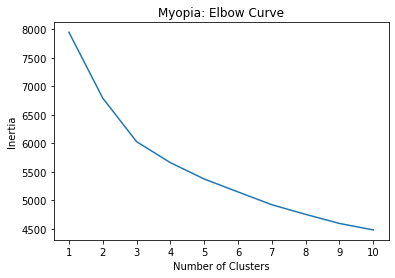

In [21]:
#plot elbow curve
elbowData = {'k': k, 'inertia': inertia}
DfElbow = pd.DataFrame(elbowData)


plt.plot(DfElbow['k'], DfElbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Myopia: Elbow Curve')
plt.show()

## Recommendations

#### Preserving 90% of the explained variance reduced our features from 14 to 10.
#### t-SNE output visualized by scatter plot did not show distinct clusters. 
#### The optimal number of clusters looks to be 3 based on the elbow curve. The change in inertia is not as significant after this point.
#### Clustering may be difficult with this data given an inability to find distinct clusters after applying dimensionality reduction. Also, the rate of change in inertia within the elbow curve was not as distinct of a change as I would have guessed. 